In [1]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

def set_seeds(seed=42):
    np.random.seed(seed)
    random.seed(seed)

In [3]:
sns.set_theme(style="whitegrid")

In [4]:
data_dir = os.path.join("..", "data")
raw_data_dir = os.path.join(data_dir, "raw")
processed_data_dir = os.path.join(data_dir, "processed")

## Load Data

In [5]:
data = pd.read_csv(os.path.join(raw_data_dir, "text_emotion.csv"), index_col=False)
len(data)

40000

In [6]:
data.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [7]:
data.dropna(inplace=True)
len(data)

40000

## Exploratory Data Analysis - EDA

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   author     40000 non-null  object
 3   content    40000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [9]:
data.describe()

,tweet_id
count,4.000000e+04
mean,1.845184e+09
std,1.188579e+08
min,1.693956e+09
25%,1.751431e+09
50%,1.855443e+09
75%,1.962781e+09
max,1.966441e+09


### 1. Sentiments Count

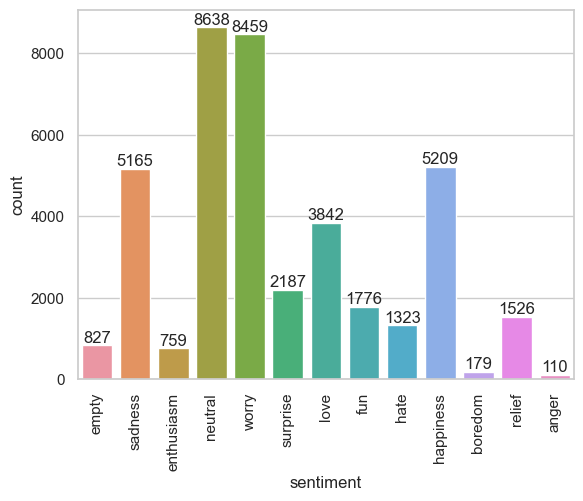

In [10]:
ax = sns.countplot(data, x="sentiment")
ax.bar_label(ax.containers[0])
ax.tick_params(axis="x", rotation=90)

**Conclusion**
- the labels (sentiments) are imbalanced
- its possible that the model might perform poorly on the "anger" & "boredom" sentiments because the lack of data.

## 2. Tweets Exploration

**Note**:

we are going to use the **NLTK's Tweet Tokenizer** because it was designed specifically to tokenize tweets and handle emojis, hashtags that we often come across when dealing with tweets.

In [11]:
# !pip install wordcloud

In [12]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ahmad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
from nltk.tokenize import TweetTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords as nltk_stopwords

In [14]:
NLTK_STOPWORDS = nltk_stopwords.words("english")

**Example:**

In [15]:
tweet=u"Snow White and the Seven Degrees #MakeAMovieCold@midnight:)"
tokenizer=TweetTokenizer()
print(tokenizer.tokenize(tweet.lower()))

['snow', 'white', 'and', 'the', 'seven', 'degrees', '#makeamoviecold', '@midnight', ':)']


In [16]:
stopwords = set(list(STOPWORDS) + NLTK_STOPWORDS)
len(stopwords)

227

### Word Cloud

In [17]:
def word_cloud(df, target_sentiment, target_col):
    sentiment_words = ""
    for content in df[df.sentiment == target_sentiment][target_col].tolist():
        content = str(content).lower().strip()
    
        # tokenize
        tokens = tokenizer.tokenize(content)
        
        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i]
        
        sentiment_words += " ".join(tokens)+" "
    
    return WordCloud(width = 800, height = 800,
                    background_color ="white",
                    stopwords = stopwords,
                    min_font_size = 10).generate(sentiment_words)

In [18]:
def sentiment_word_cloud(df, target_sentiment, ax, target_col="content"):
    wordcloud = word_cloud(df, target_sentiment, target_col)
    ax.imshow(wordcloud)
    ax.axis("off")
    ax.set_title(target_sentiment + " - Word Cloud")
    ax.plot()

In [19]:
unique_sentiments = list(data["sentiment"].value_counts().keys())

In [20]:
def plot_word_cloud(data, sentiments, dims=(7, 2), figsize=(10, 40)):
    fig, axes = plt.subplots(nrows=dims[0], ncols=dims[1], figsize=figsize)
    fig.tight_layout()
    sent_idx=0
    for i in range(dims[0]):
        for j in range(dims[1]):
            sentiment_word_cloud(data, sentiments[sent_idx], axes[i, j])
            sent_idx+=1
            if sent_idx > len(sentiments) - 1:
                break
    fig.delaxes(axes[dims[0]-1][dims[1]-1])
    fig.show()

C:\Users\ahmad\AppData\Local\Temp\ipykernel_11340\1745394383.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


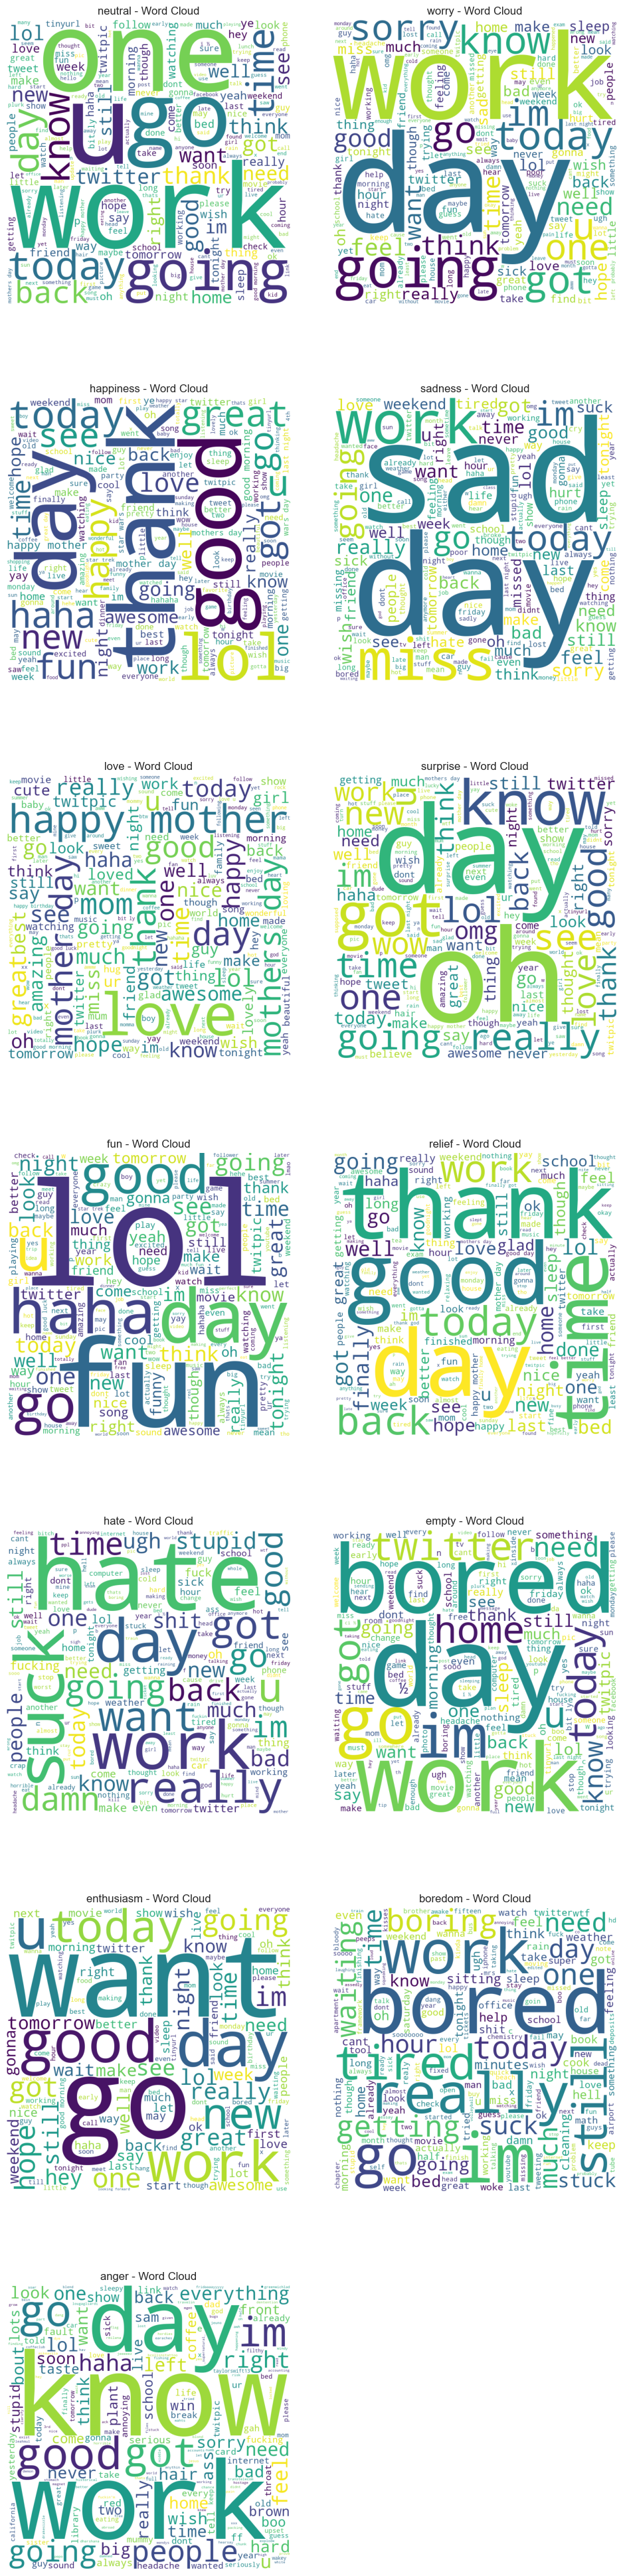

In [21]:
plot_word_cloud(data, unique_sentiments)

In [22]:
import re
from collections import Counter

In [23]:
def top_frequent_tokens(df, target_sentiment, target_col="content", top_k=10):
    cnt = Counter()
    for text in df[df.sentiment == target_sentiment][target_col].values:
        tokens = tokenizer.tokenize(text.lower())
        for token in tokens:
            if token not in stopwords and token.isalpha():
                cnt[token] += 1 
    return cnt.most_common(top_k)

In [24]:
for sentiment in unique_sentiments:
    tokens = [token for token, _ in top_frequent_tokens(data, sentiment, top_k=10)]
    print(f"most common tokens for [{sentiment}] sentiment:\n{tokens}\n")

most common tokens for [neutral] sentiment:
['go', 'day', 'good', 'work', 'going', 'one', 'back', 'today', 'know', 'got']

most common tokens for [worry] sentiment:
['go', 'day', 'good', 'work', 'got', 'going', 'today', 'know', 'sorry', 'im']

most common tokens for [happiness] sentiment:
['day', 'good', 'happy', 'thanks', 'great', 'lol', 'today', 'got', 'haha', 'fun']

most common tokens for [sadness] sentiment:
['sad', 'day', 'miss', 'work', 'go', 'today', 'im', 'got', 'going', 'really']

most common tokens for [love] sentiment:
['love', 'day', 'happy', 'good', 'mothers', 'thanks', 'u', 'lol', 'great', 'really']

most common tokens for [surprise] sentiment:
['day', 'oh', 'got', 'good', 'know', 'really', 'see', 'going', 'lol', 'one']

most common tokens for [fun] sentiment:
['lol', 'fun', 'good', 'day', 'haha', 'go', 'going', 'u', 'see', 'one']

most common tokens for [relief] sentiment:
['day', 'good', 'thanks', 'finally', 'time', 'today', 'back', 'got', 'home', 'work']

most common 

In [25]:
def contains_symbol(word):
    if not isinstance(word, str):
        return False
    return any(char.isalpha() for char in word) and any(not char.isalpha() for char in word)

In [26]:
def top_frequent_tokens_with_symbols(df, target_sentiment, target_col="content", top_k=10):
    cnt = Counter()
    for text in df[df.sentiment == target_sentiment][target_col].values:
        tokens = tokenizer.tokenize(text.lower())
        for token in tokens:
            if token not in stopwords and contains_symbol(token):
                cnt[token] += 1 
    return cnt.most_common(top_k)

In [27]:
for sentiment in unique_sentiments:
    tokens = [token for token, _ in top_frequent_tokens_with_symbols(data, sentiment, top_k=10)]
    print(f"most common non-alpha tokens for [{sentiment}] sentiment:\n{tokens}\n")

most common non-alpha tokens for [neutral] sentiment:
["mother's", '#frenchieb-day', '@mitchelmusso', '4th', ':p', '@davidarchie', '@mileycyrus', '1st', '2day', '@ddlovato']

most common non-alpha tokens for [worry] sentiment:
["mother's", '@tommcfly', '@mitchelmusso', '1st', '@mileycyrus', '2nd', '2day', '@iamdiddy', '#bgt', 'd:']

most common non-alpha tokens for [happiness] sentiment:
["mother's", '4th', '1st', ':p', '@taylorswift13', "it'll", '@davidarchie', "mom's", '@ddlovato', ';d']

most common non-alpha tokens for [sadness] sentiment:
['@mitchelmusso', "mother's", "it'll", '2nd', '2day', '@jonathanrknight', '@tommcfly', "y'all", '3d', 'b4']

most common non-alpha tokens for [love] sentiment:
["mother's", "mom's", '@tommcfly', '@ddlovato', '@taylorswift13', '@mileycyrus', 'http://tr.im/kwk9', '@jonasbrothers', '1st', '4th']

most common non-alpha tokens for [surprise] sentiment:
["mother's", '2day', '4th', '@taylorswift13', '1st', '@dougiemcfly', '2nd', '@tommcfly', '@mitchelmu

## Text Preprocessing

In [28]:
!pip install emot

- Emoji handle

In [29]:
import pickle
import emot

In [30]:
with open('Emoji_Dict.p', 'rb') as fp:
    emoji_dict = pickle.load(fp)

In [31]:
emoji_dict = {v: k for k, v in emoji_dict.items()}

In [32]:
def convert_emojis(text):
    for emot in emoji_dict:
        text = re.sub(r"("+emot+")", "_".join(emoji_dict[emot].replace(",","").replace(":","").split()), text)
    return text

In [33]:
def remove_emojis(text):
    for emot in emoji_dict:
        text = re.sub(r"("+emot+")", "", text)
    return text

In [34]:
convert_emojis("i feel sad 😢")

'i feel sad crying_face'

In [35]:
remove_emojis("i feel sad 😢")

'i feel sad '

In [36]:
EMOTICONS = emot.emo_unicode.EMOTICONS_EMO

In [37]:
# Function for converting emoticons into word
def convert_emoticons(text):
    for k, v in EMOTICONS.items():
        text = re.sub(u"("+re.escape(k)+")", "_".join(v.replace(",","").split()), text)
    return text

In [38]:
def remove_emoticons(text):
    for k, _ in EMOTICONS.items():
        text = re.sub(u"("+re.escape(k)+")", "", text)
    return text

In [39]:
convert_emoticons("Hello :-) :-)")

'Hello Happy_face_smiley Happy_face_smiley'

In [40]:
remove_emoticons("Hello :-) :-)")

'Hello  '

In [41]:
def remove_links(text: str):
    return re.sub(r'http\S+', "", text)

In [42]:
remove_links("this is a link http://tr.im/kwk9 that gonna be removed")

'this is a link  that gonna be removed'

In [43]:
import re

def expand_contractions(text):
    # Define a dictionary of contractions and their expanded forms
    contractions_dict = {
        "aren't": "are not",
        "can't": "cannot",
        "could've": "could have",
        "couldn't": "could not",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he'll": "he will",
        "he's": "he is",
        "how'd": "how did",
        "how'll": "how will",
        "how's": "how is",
        "i'd": "i would",
        "i'll": "i will",
        "i'm": "i am",
        "i've": "i have",
        "isn't": "is not",
        "it'd": "it would",
        "it'll": "it will",
        "it's": "it is",
        "let's": "let us",
        "might've": "might have",
        "must've": "must have",
        "mustn't": "must not",
        "needn't": "need not",
        "ought to": "ought to",
        "shan't": "shall not",
        "she'd": "she would",
        "she'll": "she will",
        "she's": "she is",
        "should've": "should have",
        "shouldn't": "should not",
        "that's": "that is",
        "there's": "there is",
        "they'd": "they would",
        "they'll": "they will",
        "they're": "they are",
        "they've": "they have",
        "wasn't": "was not",
        "we'd": "we would",
        "we'll": "we will",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what will",
        "what're": "what are",
        "what's": "what is",
        "what've": "what have",
        "when's": "when is",
        "where'd": "where did",
        "where's": "where is",
        "where've": "where have",
        "who'll": "who will",
        "who's": "who is",
        "who've": "who have",
        "why's": "why is",
        "won't": "will not",
        "would've": "would have",
        "wouldn't": "would not",
        "you'd": "you would",
        "you'll": "you will",
        "you're": "you are",
        "you've": "you have",
        "2day": "today",
        "b4": "before",
        "1st": "first",
        "2nd": "second",
        "3th": "third",
        "4th": "fourth",
        "5th": "fifth",
        "6th": "sixth",
        "7th": "seventh",
        "8th": "eighth",
        "9th": "ninth",
        "10th": "tenth"
    }
    
    # Define a regular expression pattern to match contractions
    contraction_pattern = re.compile(r'\b(' + "|".join(contractions_dict.keys()) + r")\b")
    
    # Replace all matches of the contraction pattern with their expanded forms
    text = contraction_pattern.sub(lambda match: contractions_dict[match.group(0)], text)
    
    return text


In [44]:
expand_contractions("i'll be there for you")

'i will be there for you'

- remove punctuations

In [45]:
def remove_punctuations(text):
    tokens = tokenizer.tokenize(text)

    # Define a regular expression pattern to match all punctuation except "@" and "#"
    punctuation_pattern = re.compile(r'[^\w\s@#\!]')

    # Replace all matches of the punctuation pattern with an empty string
    tokens = [punctuation_pattern.sub("", token) for token in tokens]
    
    # Join tokens
    text = " ".join(tokens)
    # Return the updated text
    return text

- remove extra spaces

In [46]:
def remove_extra_spaces(text):
    text = text.strip()
    text = " ".join(text.split())
    return text

- stemming

In [47]:
from nltk.stem import PorterStemmer

In [48]:
stemmer = PorterStemmer()

## Preprocess

In [49]:
def preprocess(text: str, strip_links=True, strip_emojis=False, strip_punctuations=True, expand_shortcuts=True, stem=True, lower=True):
    if lower:
        text = text.lower()
    if strip_links:
        text = remove_links(text)
    if strip_emojis:
        text = convert_emojis(text)
        text = convert_emoticons(text)
    if expand_shortcuts:
        text = expand_contractions(text)
    if strip_punctuations:
        text = remove_punctuations(text)
    if stem:
        text = " ".join([stemmer.stem(token) for token in tokenizer.tokenize(text)])
    return remove_extra_spaces(text)

In [50]:
preprocess("Funeral ceremony...gloomy friday")

'funer ceremoni gloomi friday'

## Label Encoding

In [51]:
import json

In [52]:
class LabelEncoder(object):
    def __init__(self, class_to_index={}):
        self.class_to_index = class_to_index or {}
        self.index_to_class = {v: k for k, v in self.class_to_index.items()}
        self.classes = list(self.class_to_index.keys())
    
    def __len__(self):
        return len(self.class_to_index)

    def __str__(self):
        return f"<LabelEncoder(num_classes={len(self)})>"

    def fit(self, y):
        classes = np.unique(y)
        for i, class_ in enumerate(classes):
            self.class_to_index[class_] = i
        self.index_to_class = {v: k for k, v in self.class_to_index.items()}
        self.classes = list(self.class_to_index.keys())
        return self
    
    def encode(self, y):
        encoded = np.zeros((len(y)), dtype=int)
        for i, item in enumerate(y):
            encoded[i] = self.class_to_index[item]
        return encoded
    
    def decode(self, y):
        classes = []
        for _, item in enumerate(y):
            classes.append(self.index_to_class[item])
        return classes

    def save(self, filepath):
        with open(filepath, "w") as fp:
            contents = {"class_to_index": self.class_to_index}
            json.dump(contents, fp, indent=4, sort_keys=False)

    @classmethod
    def load(cls, filepath):
        with open(filepath, "r") as fp:
            kwargs = json.load(fp)
            return cls(**kwargs)

In [53]:
label_encoder = LabelEncoder()

In [54]:
y = data['sentiment'].tolist()
label_encoder.fit(y)
num_classes = len(label_encoder)
num_classes

13

In [55]:
y = label_encoder.encode(y)

In [56]:
X = data['content'].tolist()

In [57]:
label_encoder.class_to_index

{'anger': 0,
 'boredom': 1,
 'empty': 2,
 'enthusiasm': 3,
 'fun': 4,
 'happiness': 5,
 'hate': 6,
 'love': 7,
 'neutral': 8,
 'relief': 9,
 'sadness': 10,
 'surprise': 11,
 'worry': 12}

In [58]:
label_encoder.encode(["anger", "love"])

array([0, 7])

In [59]:
label_encoder.decode([0, 7])

['anger', 'love']

## Split Data

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
# Split sizes
train_size = 0.7
val_size = 0.15
test_size = 0.15

In [62]:
# Split (train)
X_train, X_, y_train, y_ = train_test_split(X, y, train_size=train_size, stratify=y)

In [63]:
print (f"train: {len(X_train)} ({(len(X_train) / len(X)):.2f})\n"
       f"remaining: {len(X_)} ({(len(X_) / len(X)):.2f})")

train: 28000 (0.70)
remaining: 12000 (0.30)


In [64]:
# Split (test)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, train_size=0.5, stratify=y_)

In [65]:
print(f"train: {len(X_train)} ({len(X_train)/len(X):.2f})\n"
      f"val: {len(X_val)} ({len(X_val)/len(X):.2f})\n"
      f"test: {len(X_test)} ({len(X_test)/len(X):.2f})")


train: 28000 (0.70)
val: 6000 (0.15)
test: 6000 (0.15)


In [66]:
y_train[:5]

array([ 8,  8, 12,  8, 12])

In [67]:
# Get counts for each class
counts = {}
counts["train_counts"] = {tag: label_encoder.decode(y_train).count(tag) for tag in label_encoder.classes}
counts["val_counts"] = {tag: label_encoder.decode(y_val).count(tag) for tag in label_encoder.classes}
counts["test_counts"] = {tag: label_encoder.decode(y_test).count(tag) for tag in label_encoder.classes}

In [68]:
# View distributions
pd.DataFrame({
    "train": counts["train_counts"],
    "val": counts["val_counts"],
    "test": counts["test_counts"]
}).T.fillna(0)

,anger,boredom,empty,enthusiasm,fun,happiness,hate,love,neutral,relief,sadness,surprise,worry
train,77,125,579,531,1243,3646,926,2690,6047,1068,3616,1531,5921
val,17,27,124,114,266,782,198,576,1295,229,775,328,1269
test,16,27,124,114,267,781,199,576,1296,229,774,328,1269


In [69]:
# Adjust counts across splits
for k in counts["val_counts"].keys():
    counts["val_counts"][k] = int(counts["val_counts"][k] * \
        (train_size/val_size))
for k in counts["test_counts"].keys():
    counts["test_counts"][k] = int(counts["test_counts"][k] * \
        (train_size/test_size))

In [70]:
dist_df = pd.DataFrame({
    "train": counts["train_counts"],
    "val": counts["val_counts"],
    "test": counts["test_counts"]
}).T.fillna(0)
dist_df

,anger,boredom,empty,enthusiasm,fun,happiness,hate,love,neutral,relief,sadness,surprise,worry
train,77,125,579,531,1243,3646,926,2690,6047,1068,3616,1531,5921
val,79,126,578,532,1241,3649,924,2688,6043,1068,3616,1530,5922
test,74,126,578,532,1246,3644,928,2688,6048,1068,3612,1530,5922


We can see how much deviance there is in our naive data splits by computing the standard deviation of each split's class counts from the mean (ideal split).

In [71]:
# Standard deviation
np.mean(np.std(dist_df.to_numpy(), axis=0))

1.164854137922697

In [72]:
y_train[:5]

array([ 8,  8, 12,  8, 12])

In [73]:
train_df = pd.DataFrame({"content": X_train, "sentiment": label_encoder.decode(y_train)})
val_df = pd.DataFrame({"content": X_val, "sentiment": label_encoder.decode(y_val)})
test_df = pd.DataFrame({"content": X_test, "sentiment": label_encoder.decode(y_test)})

In [74]:
train_df.head()

,content,sentiment
0,25-man Ulduar is hard...,neutral
1,wants to sign up for the Germany field trip pe...,neutral
2,Visiting family in hospital = not fun,worry
3,#frenchieb-day #frenchieb-day #frenchieb-day #...,neutral
4,i've just woken up,worry


## Data Augmentation

In [75]:
# !pip install nlpaug

In [76]:
import nlpaug.augmenter.word as naw

In [77]:
substitution = naw.ContextualWordEmbsAug(model_path="distilbert-base-uncased", action="substitute")
insertion = naw.ContextualWordEmbsAug(model_path="distilbert-base-uncased", action="insert")

In [78]:
text = "i am very happy for you"

In [79]:
# Substitution
substitution.augment(text)

['they am very happy for them']

In [80]:
# Insertions
insertion.augment(text)


['i truly am very heart happy for you']

In [81]:
synonyms_by_feeling = {
    "sad": ["heart broken", "unhappy", "not happy", "wistful", "sorrowful"],
    "happy": ["cheerful", "delighted", "ecstatic", "pleased", "glad", "blessed"],
    "angry": ["bitter", "annoyed", "furious", "uptight", "heated", "resentful", "enraged", "fury"],
    "neutral": ["calm", "cool", "relax", "disinterested", "inactive "],
    "hate": ["dislike", "despise", "disfavor", "disfavour", "loathe", "detest", "disrespect"],
    "worry": ["fear", "concern", "doubt", "uncertainty", "misery"],
    "love": ["like", "admire", "passion", "lust", "respect"],
    "relief": ["comfort", "satisfied", "thankful", "greatful"],
    "empty": ["pointless", "hollow", "meaningless", "blank", "emotionless", "numb"],
    "enthusiasm": ["ardor", "passion", "exited", "interest", "joy"],
    "bored": ["disinterested", "tired", "fed up"],
    "fun": ["amusing", "entertaining", "enjoyable", "entertaining"],
    "surprise": ["astonish", "amaze", "stun", "shock"]
}

In [82]:
feeling_synonyms= {}
for tag, synonyms in synonyms_by_feeling.items():
    if len(synonyms):
        feeling_synonyms[tag] = synonyms
    for synonym in synonyms:
        _synonyms = synonyms + [tag]
        _synonyms.remove(synonym)
        feeling_synonyms[synonym] = _synonyms

In [83]:
feeling_synonyms["pointless"]

['hollow', 'meaningless', 'blank', 'emotionless', 'numb', 'empty']

In [84]:
feeling_synonyms["unhappy"]

['heart broken', 'not happy', 'wistful', 'sorrowful', 'sad']

In [85]:
# \b matches spaces
def find_word(word, text):
    word = word.replace("+", "\+")
    pattern = re.compile(fr"\b({word})\b", flags=re.IGNORECASE)
    return pattern.search(text)

In [86]:
find_word("happy", "i feel very happy today!!")

<re.Match object; span=(12, 17), match='happy'>

In [87]:
from snorkel.augmentation import transformation_function

In [88]:
@transformation_function()
def swap_synonyms(x):
    # Find all matches
    matches = []
    for i, synonym in enumerate(feeling_synonyms):
        match = find_word(synonym, x.content)
        if match:
            matches.append(match)
    # Swap a random match with a random alias
    if len(matches):
        match = random.choice(matches)
        synonym = x.content[match.start():match.end()]
        x.content = f"{x.content[:match.start()]}{random.choice(feeling_synonyms[synonym])}{x.content[match.end():]}"
    return x

In [89]:
# Swap
for i in range(3):
    sample_df = pd.DataFrame([{"content": "i am feeling very happy today!!"}])
    sample_df.content = sample_df.content.apply(preprocess, stem=False)
    print (swap_synonyms(sample_df.iloc[0]).content)

i am feeling very ecstatic today ! !
i am feeling very delighted today ! !
i am feeling very glad today ! !


In [90]:
from snorkel.augmentation import ApplyOnePolicy, PandasTFApplier

In [91]:
# Transformation function (TF) policy
policy = ApplyOnePolicy(n_per_original=5, keep_original=True)
tf_applier = PandasTFApplier([swap_synonyms], policy)
train_df["content"] = train_df["content"].apply(preprocess, stem=False, lower=True)
train_df_augmented = tf_applier.apply(train_df)
train_df_augmented.drop_duplicates(subset=["content"], inplace=True)
train_df_augmented.head()


100%|██████████| 28000/28000 [06:54<00:00, 67.55it/s]


,content,sentiment
0,25 man ulduar is hard,neutral
1,wants to sign up for the germany field trip pe...,neutral
2,visiting family in hospital not fun,worry
2,visiting family in hospital not enjoyable,worry
2,visiting family in hospital not entertaining,worry


In [92]:
print(f"train size before augmantation = {len(train_df)}\ntrain size after augmantation = {len(train_df_augmented)}\ndifference = {len(train_df_augmented) - len(train_df)}")

train size before augmantation = 28000
train size after augmantation = 45717
difference = 17717


## Modeling

### Baselines

- Random

In [93]:
from sklearn.metrics import precision_recall_fscore_support

In [94]:
set_seeds()

In [95]:
rand_idx = random.randint(0, len(X))

In [96]:
print(f"sample:\nX = {X[rand_idx]}\ny = {y[0]}")

sample:
X = @gdrage LOL that'll teach me to blindly trust amazon search results without reading!
y = 2


In [97]:
preprocess(X[rand_idx])

'@gdrage lol thatll teach me to blindli trust amazon search result without read !'

In [98]:

def get_data_splits(X, y, train_size=0.7):
    X_train, X_, y_train, y_ = train_test_split(
        X, y, train_size=train_size, stratify=y)
    X_val, X_test, y_val, y_test = train_test_split(
        X_, y_, train_size=0.5, stratify=y_)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [99]:
def prepare_data(df):
    X = df["content"].apply(preprocess)
    y = label_encoder.encode(df["sentiment"].tolist())
    return X, y

In [100]:
X_train, y_train = prepare_data(train_df)
X_val, y_val = prepare_data(val_df)
X_test, y_test = prepare_data(test_df)

In [101]:

# Generate random predictions
y_pred = np.random.randint(low=0, high=len(label_encoder), size=len(y_test))

In [102]:

# Evaluate
metrics = precision_recall_fscore_support(y_test, y_pred, average="weighted")
performance = {"precision": metrics[0], "recall": metrics[1], "f1": metrics[2]}
print (json.dumps(performance, indent=2))

{
  "precision": 0.1563293919694831,
  "recall": 0.08366666666666667,
  "f1": 0.1010919203222662
}


In [103]:
# Class frequencies
p = [Counter(y_test)[index]/len(y_test) for index in range(len(label_encoder))]
p

[0.0026666666666666666,
 0.0045,
 0.020666666666666667,
 0.019,
 0.0445,
 0.13016666666666668,
 0.033166666666666664,
 0.096,
 0.216,
 0.03816666666666667,
 0.129,
 0.05466666666666667,
 0.2115]

In [104]:
# Generate weighted random predictions
y_pred = np.random.choice(a=range(len(label_encoder)), size=len(y_test), p=p)

In [105]:
# Evaluate
metrics = precision_recall_fscore_support(y_test, y_pred, average="weighted")
performance = {"precision": metrics[0], "recall": metrics[1], "f1": metrics[2]}
print (json.dumps(performance, indent=2))


{
  "precision": 0.14471522240965737,
  "recall": 0.14483333333333334,
  "f1": 0.1446935229831661
}


- Rule-Based

In [106]:
synonyms_by_feeling

{'sad': ['heart broken', 'unhappy', 'not happy', 'wistful', 'sorrowful'],
 'happy': ['cheerful', 'delighted', 'ecstatic', 'pleased', 'glad', 'blessed'],
 'angry': ['bitter',
  'annoyed',
  'furious',
  'uptight',
  'heated',
  'resentful',
  'enraged',
  'fury'],
 'neutral': ['calm', 'cool', 'relax', 'disinterested', 'inactive '],
 'hate': ['dislike',
  'despise',
  'disfavor',
  'disfavour',
  'loathe',
  'detest',
  'disrespect'],
 'worry': ['fear', 'concern', 'doubt', 'uncertainty', 'misery'],
 'love': ['like', 'admire', 'passion', 'lust', 'respect'],
 'relief': ['comfort', 'satisfied', 'thankful', 'greatful'],
 'empty': ['pointless',
  'hollow',
  'meaningless',
  'blank',
  'emotionless',
  'numb'],
 'enthusiasm': ['ardor', 'passion', 'exited', 'interest', 'joy'],
 'bored': ['disinterested', 'tired', 'fed up'],
 'fun': ['amusing', 'entertaining', 'enjoyable', 'entertaining'],
 'surprise': ['astonish', 'amaze', 'stun', 'shock']}

In [107]:
feeling_by_sentiment = {
    "sad": "sadness",
    "happy": "happiness",
    "angry": "anger",
    "neutral": "neutral",
    "hate": "hate",
    "worry": "worry",
    "love": "love",
    "relief": "relief",
    "empty": "empty",
    "enthusiasm": "enthusiasm",
    "bored": "boredom",
    "fun": "fun",
    "surprise": "surprise",
}

In [108]:
feeling_by_sentiment = {preprocess(k): v for k, v in feeling_by_sentiment.items()}
feeling_by_sentiment

{'sad': 'sadness',
 'happi': 'happiness',
 'angri': 'anger',
 'neutral': 'neutral',
 'hate': 'hate',
 'worri': 'worry',
 'love': 'love',
 'relief': 'relief',
 'empti': 'empty',
 'enthusiasm': 'enthusiasm',
 'bore': 'boredom',
 'fun': 'fun',
 'surpris': 'surprise'}

In [109]:
def get_sentiment(feeling):
    sentiment = feeling_by_sentiment.get(feeling)
    return label_encoder.encode([sentiment])[0]

In [110]:
def predict_sentiment(text, synonyms_by_feeling):
    text = preprocess(text)
    for feeling, synonyms in synonyms_by_feeling.items():
        feeling = preprocess(feeling)
        if feeling in text:
            return get_sentiment(feeling)
        for synonym in synonyms:
            synonym = preprocess(synonym)
            if synonym in text:
                return get_sentiment(feeling)
    return np.random.choice(a=range(len(label_encoder)), size=1, p=p)[0]

In [111]:
text = "i feel very happy"
sentiment_idx = predict_sentiment(text, synonyms_by_feeling)
sentiment = label_encoder.decode([sentiment_idx])[0]
sentiment

'happiness'

In [112]:
y_pred = np.array([predict_sentiment(text, synonyms_by_feeling) for text in X_test])
y_pred[:5]

array([ 3,  8,  9, 12,  4])

In [113]:
# Evaluate
metrics = precision_recall_fscore_support(y_test, y_pred, average="weighted")
performance = {"precision": metrics[0], "recall": metrics[1], "f1": metrics[2]}
print (json.dumps(performance, indent=2))

{
  "precision": 0.1879280215912658,
  "recall": 0.17533333333333334,
  "f1": 0.1772512670743569
}


- Vectorization

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [137]:
vectorizer = TfidfVectorizer(analyzer="char", ngram_range=(2,7))

In [116]:
print (X_train[0])

25 man ulduar is hard


In [117]:
X_train = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(X_val)
X_test = vectorizer.transform(X_test)

In [118]:
print (X_train.shape)

(28000, 1322132)


In [119]:
# Class weights
counts = np.bincount(y_train)
class_weights = {i: 1.0/count for i, count in enumerate(counts)}
print (f"class counts: {counts},\nclass weights: {class_weights}")

class counts: [  77  125  579  531 1243 3646  926 2690 6047 1068 3616 1531 5921],
class weights: {0: 0.012987012987012988, 1: 0.008, 2: 0.0017271157167530224, 3: 0.0018832391713747645, 4: 0.0008045052292839903, 5: 0.00027427317608337906, 6: 0.0010799136069114472, 7: 0.0003717472118959108, 8: 0.000165371258475277, 9: 0.0009363295880149813, 10: 0.0002765486725663717, 11: 0.0006531678641410843, 12: 0.00016889039013680122}


- Data imbalance

In [120]:
!pip install imbalanced-learn

                                              0.0/226.0 kB ? eta -:--:--
     -----                                   30.7/226.0 kB 1.4 MB/s eta 0:00:01
     ------------------                     112.6/226.0 kB 1.1 MB/s eta 0:00:01
     -----------------------------          174.1/226.0 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 226.0/226.0 kB 1.3 MB/s eta 0:00:00


In [121]:
from imblearn.over_sampling import RandomOverSampler

In [122]:
# Oversample (training set)
oversample = RandomOverSampler(sampling_strategy="all")
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [123]:
# Class weights
counts = np.bincount(y_over)
class_weights = {i: 1.0/count for i, count in enumerate(counts)}
print (f"class counts: {counts},\nclass weights: {class_weights}")

class counts: [6047 6047 6047 6047 6047 6047 6047 6047 6047 6047 6047 6047 6047],
class weights: {0: 0.000165371258475277, 1: 0.000165371258475277, 2: 0.000165371258475277, 3: 0.000165371258475277, 4: 0.000165371258475277, 5: 0.000165371258475277, 6: 0.000165371258475277, 7: 0.000165371258475277, 8: 0.000165371258475277, 9: 0.000165371258475277, 10: 0.000165371258475277, 11: 0.000165371258475277, 12: 0.000165371258475277}


- Machine Learning

In [127]:
from sklearn import metrics
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import log_loss, precision_recall_fscore_support

In [135]:
# Initialize model
model = SGDClassifier(
    loss="log", penalty="l2", alpha=1e-4, max_iter=1,
    learning_rate="constant", eta0=1e-1, power_t=0.1,
    warm_start=True)

In [128]:
pipe = make_pipeline(vectorizer, model)

In [133]:
import warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [136]:
# Train model
num_epochs = 5
for epoch in range(num_epochs):
    # Training
    model.fit(X_over, y_over)   

    # Evaluation
    train_loss = log_loss(y_train, model.predict_proba(X_train))
    val_loss = log_loss(y_val, model.predict_proba(X_val))

    if not epoch%1:
        print(
            f"Epoch: {epoch:02d} | "
            f"train_loss: {train_loss:.5f}, "
            f"val_loss: {val_loss:.5f}"
        )

Epoch: 00 | train_loss: 2.20998, val_loss: 2.32887
Epoch: 01 | train_loss: 2.12733, val_loss: 2.29503
Epoch: 02 | train_loss: 2.08705, val_loss: 2.27465
Epoch: 03 | train_loss: 2.07674, val_loss: 2.27361
Epoch: 04 | train_loss: 2.05570, val_loss: 2.25605
